
## **Exercise 1.**
 Compute the Jaccard similarity index

• Load ‘word_tokenize’ and ‘WordNetLemmatizer’ from nltk, among  other libraries

• Use these pairs for comparison:
   
    pair1 = ["What you do defines you","Your deeds define you"]  
   
    pair2 = ["Once upon a time there lived a king.", "Who is your  queen?"]
   
    pair3 = ["He is desperate", "Is he not desperate?"]

• What is the Jaccard similarity index between pair1[0] and pair1[1]?


In [6]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Pairs for comparison
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

#Computing Jaccard similarity index
def jaccard_similarity(sentence1, sentence2):
    lemmatizer = WordNetLemmatizer()
    words1 = set(lemmatizer.lemmatize(word.lower()) for word in word_tokenize(sentence1))
    words2 = set(lemmatizer.lemmatize(word.lower()) for word in word_tokenize(sentence2))
    #jaccard similarity index
    intersection = len(words1.intersection(words2))
    union = len(words1.union(words2))
    return intersection / union

#Jaccard similarity for pair1
similarity_pair1 = jaccard_similarity(pair1[0], pair1[1])
print(f"Jaccard similarity index between pair1[0] and pair1[1]: {similarity_pair1:.2f}")


Jaccard similarity index between pair1[0] and pair1[1]: 0.14


In [7]:
pip install python-Levenshtein


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.3 MB/s eta 0:00:00


## Exercise 2.

Compute the Levenshtein distance between "I cannot believe  what he said" and "I believe it is not what he said". What does the result  mean?


In [8]:
import Levenshtein

# Define the two strings
str1 = "I cannot believe what he said"
str2 = "I believe it is not what he said"

# Compute the Levenshtein distance
l_dist = Levenshtein.distance(str1, str2)

# Display the result
print(f"Levenshtein distance between the two strings: {l_dist}")


Levenshtein distance between the two strings: 15


## **Observation**
  A Levenshtein distance of 15 suggests that you'd have to change 15 individual letters (by adding, removing, or replacing them) to turn one sentence into the other. This indicates a notable difference between the two sentences.

## Exercise 3.

Compute the most similar words to 'government' and 'curfew'  based on the text.

In [13]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import re

with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

#tokenizing the text into words
tokenized_text = [word.lower() for word in word_tokenize(text) if word.isalnum()]
preprocessed_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
tokenized_preprocessed_text = [word.lower() for word in word_tokenize(preprocessed_text) if word.isalnum()]

#Word2Vec model
model = Word2Vec([tokenized_preprocessed_text], min_count=1, vector_size=100, window=5)

#most similar words to 'government' and 'curfew'
sw_government = model.wv.most_similar('government', topn=5)
sw_curfew = model.wv.most_similar('curfew', topn=5)

# Display the results
print(f"Most similar words to 'government': {sw_government}")
print(f"Most similar words to 'curfew': {sw_curfew}")


Most similar words to 'government': [('estimates', 0.2538596987724304), ('13632', 0.23005418479442596), ('curfew', 0.22393612563610077), ('tweet', 0.21029351651668549), ('reported', 0.20671945810317993)]
Most similar words to 'curfew': [('day', 0.26818928122520447), ('24', 0.23365794122219086), ('living', 0.22575144469738007), ('remains', 0.22442859411239624), ('government', 0.22393612563610077)]


## Exercise 4.

What is the sentiment and subjectivity of the Europe_Covid  text?


In [15]:
from textblob import TextBlob

with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

blob = TextBlob(text)
sentiment = blob.sentiment
subjectivity = blob.subjectivity
print(f"Sentiment: {sentiment.polarity}")
print(f"Subjectivity: {subjectivity}")


Sentiment: 0.04992382294707877
Subjectivity: 0.3476432095036746


## Exercise 5. WordCloud

• What are the most frequently used words in the Europe_Covid text?

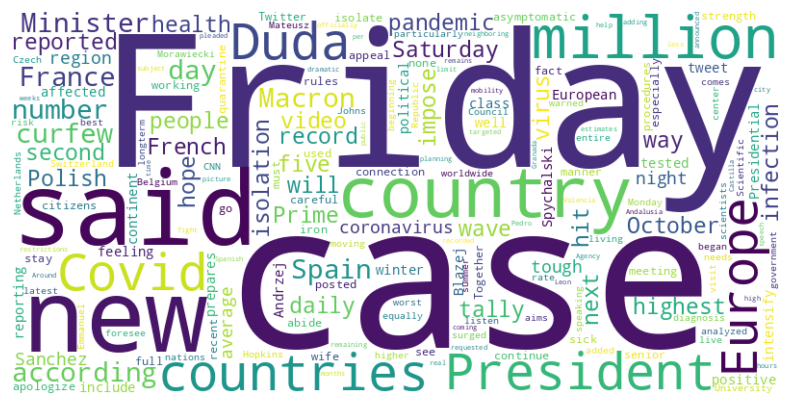

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

#generating the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Exercise 6.

Summarize the text in 5 sentences using extractive  summarization.  

In [24]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

parser = PlaintextParser.from_string(text, Tokenizer("english"))

#initializing the LexRankSummarizer
summarizer = LexRankSummarizer()

#generating summary with 5 sentences
summary = summarizer(parser.document, sentences_count=5)


print("Summary : ")

for sentence in summary:
    print(sentence)


Summary : 
Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.
I hope none of you get sick."
Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.
Around 46 million people in the country are subject to a night-time coronavirus curfew in France.
Spain's Prime Minister Pedro Sanchez pleaded with the public to limit their mobility and help fight a second wave, during a speech on Friday.


## Exercise 7.

Use a zero-shot transformer to determine the following  categories: informational, query, advocacy, not informational.


In [26]:
from transformers import pipeline

with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

#defining the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

categories = ["informational", "query", "advocacy", "not informational"]

# Classification result
result = classifier(text, categories)
for category, score in zip(result["labels"], result["scores"]):
    print(f"{category}: {score:.4f}")


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

advocacy: 0.3609
query: 0.3519
informational: 0.2507
not informational: 0.0365
